<a href="https://colab.research.google.com/github/vamejiag/machine-learning-notebooks/blob/master/NN_Wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting muscle activation with Neural Networks

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys

Mounted at /content/drive


In [2]:
%matplotlib inline
plt.style.use(['ggplot'])
%config InlineBackend.figure_format = 'svg'
# centimeters in inches
cm = 1/2.54

### **Function to first recognition of data**

In [3]:
# Reading the csv file into a pandas DataFrame
data_path = "/content/drive/Shareddrives/APISI/Machine Learning/Notebooks/wavelets/NN_data.txt"
data = pd.read_csv(data_path, sep="\t",header=None,comment='#',names = ['eigen1','eigen2','eigen3','eigen4','eigen5','activation'])

In [4]:
# Printing out the first rows of our data
data.head()

eigen1    eigen2    eigen3    eigen4    eigen5  activation
0  0.126723  0.000021  0.001229  0.005029  0.004065         0.0
1  0.127628  0.000019  0.001250  0.003622  0.006488         0.0
2  0.162436  0.000020  0.001327  0.003164  0.006801         0.0
3  0.150171  0.000021  0.001373  0.003272  0.005442         0.0
4  0.109040  0.000024  0.001170  0.004631  0.003813         0.0

In [5]:
#Check for null values
print('Check for null values\n', data.isnull().sum())

Check for null values
 eigen1        0
eigen2        0
eigen3        0
eigen4        0
eigen5        0
activation    0
dtype: int64


In [6]:
# Describe the data overall statistics analysis, applymap to round decimals
data.describe().applymap('{:,.2f}'.format)

eigen1  eigen2  eigen3  eigen4  eigen5 activation
count    695.00  695.00  695.00  695.00  695.00     695.00
mean     124.31    0.67    0.02    0.05    0.18       0.56
std      219.27    1.32    0.07    0.10    0.39       0.50
min        0.10    0.00    0.00    0.00    0.00       0.00
25%        1.51    0.00    0.00    0.01    0.02       0.00
50%       28.27    0.06    0.00    0.01    0.06       1.00
75%      142.83    0.83    0.01    0.05    0.19       1.00
max    1,535.10   11.04    0.77    1.21    5.13       1.00

In [7]:
# min max values and chech up for categorical values
print('makes sure that only contains the 2 clases:', data['activation'].unique())
#eigen1
print('range values for eigen1: {:.0f},{:.0f}'.format(data.eigen1.max(),data.eigen1.min()))
#eigen2
print('range values for eigen2: {:.0f},{:.0f}'.format(data.eigen2.max(),data.eigen2.min()))
#eigen3
print('range values for eigen3: {:.0f},{:.0f}'.format(data.eigen3.max(),data.eigen3.min()))
#eigen4
print('range values for eigen4: {:.0f},{:.0f}'.format(data.eigen4.max(),data.eigen4.min()))
#eigen5
print('range values for eigen5: {:.0f},{:.0f}'.format(data.eigen5.max(),data.eigen5.min()))

makes sure that only contains the 2 clases: [0. 1.]
range values for eigen1: 1535,0
range values for eigen2: 11,0
range values for eigen3: 1,0
range values for eigen4: 1,0
range values for eigen5: 5,0


**Data Plotting**

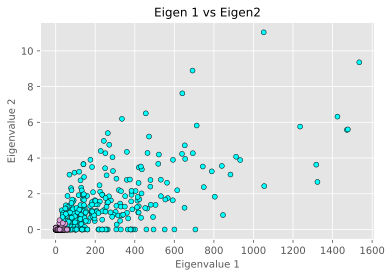

In [8]:
# Function to help us plot
def plot_points(data,title):
    X = np.array(data[['eigen1','eigen2','eigen3','eigen4','eigen5']])
    y = np.array(data["activation"])
    active = X[np.argwhere(y==1)]
    deactive = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in active], [s[0][1] for s in active], s = 25, color = 'cyan', edgecolor = 'k')
    plt.scatter([s[0][0] for s in deactive], [s[0][1] for s in deactive], s = 25, color = 'plum', edgecolor = 'k')
    plt.xlabel('Eigenvalue 1',fontsize=10)
    plt.ylabel('Eigenvalue 2',fontsize=10)
    plt.title(title,fontsize=12)

    
# Plotting the points
plot_points(data,title='Eigen 1 vs Eigen2')
plt.show()

Roughly, it looks like Eigen values higher than 100 are determined by active state, let's make a loglog plot to amplify the view

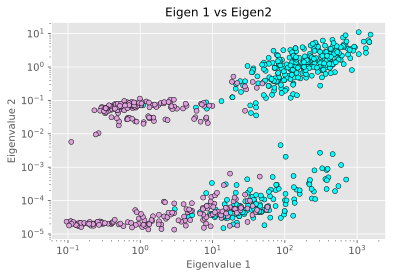

In [9]:
# Plotting the points
plot_points(data,title='Eigen 1 vs Eigen2')
plt.xscale('log')
plt.yscale('log')
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

### **Plot distributions**

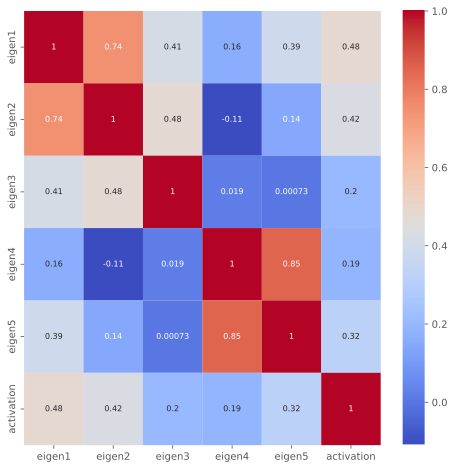

In [10]:
# We use annot = True to print the values inside the square
correlation_matrix = data.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(data = correlation_matrix, annot = True,cmap="coolwarm",annot_kws={'fontsize': 8})

In [11]:
figure = sns.pairplot(data,hue='activation',palette=sns.color_palette("tab10",n_colors=2))
figure.fig.set_size_inches(15,7.5)
for ax in figure.axes.flat:
  ax.set(xscale="log")
  ax.set(yscale="log")

In [12]:
figure = sns.pairplot(data,hue='activation',palette=sns.color_palette("tab10",n_colors=2))
figure.fig.set_size_inches(15,7.5)

**One-HOT Encoding**

Not appliable for this NN 

### **Scaling & splitting data**

The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

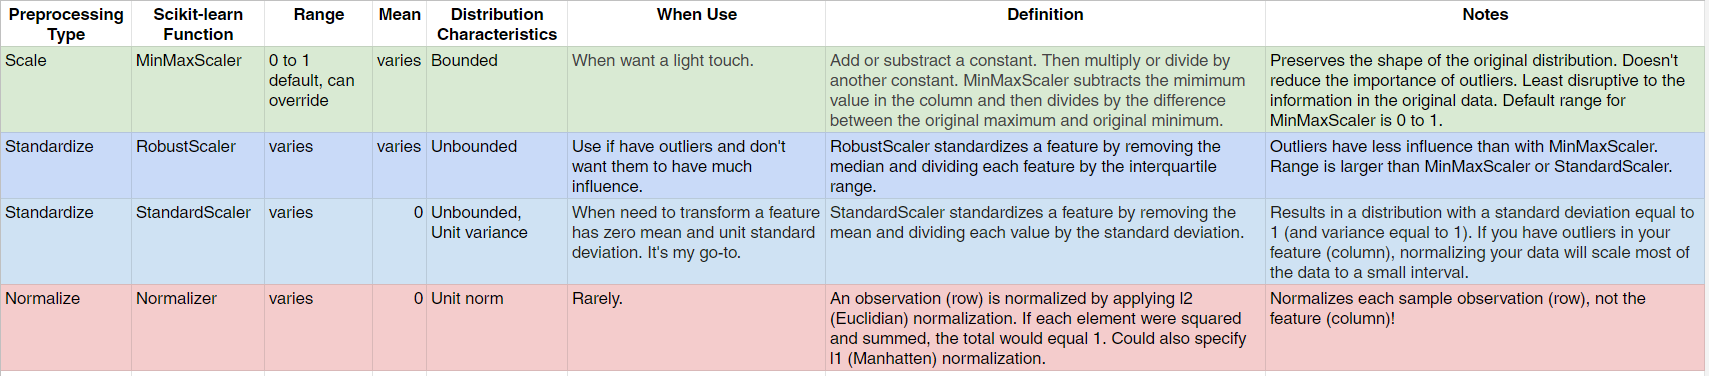

Code explaining differences
<br> *https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02*

<br> Code to test normality of the data
<br>*https://www.statology.org/normality-test-python/#:~:text=(Visual%20Method)%20Create%20a%20Q%2DQ,assumed%20to%20be%20normally%20distributed.*

**Steps:**
<br>Step 1: fit the `scaler` on the `TRAINING data`
<br>Step 2: use the `scaler` to transform the `TRAINING data`
<br>Step 3: use the `transformed training data` to fit the `predictive model`
<br>Step 4: use the `scaler` to transform the `TEST data`
<br>Step 5: predict using the `trained model` (step 3) and the `transformed TEST data` (step 4).

In [13]:
#data split
X = data.drop('activation',axis=1)
y = data.activation

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=True, random_state=1)

In [15]:
X_train.dtypes

eigen1    float64
eigen2    float64
eigen3    float64
eigen4    float64
eigen5    float64
dtype: object

In [16]:
scaler = MinMaxScaler()
#fit the data
scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_train)
#scale with the fited data
X_test_scaled = scaler.transform(X_test)

In [17]:
print("Number of training samples is", len(X_train_scaled))
print("Number of testing samples is", len(X_test_scaled))
print(X_train_scaled[:5])
print(X_test_scaled[:5])


Number of training samples is 625
Number of testing samples is 70
[[1.41702625e-02 8.75512207e-06 1.13625051e-02 5.23539211e-02
  2.86778066e-02]
 [3.86924356e-04 6.70485580e-03 3.50264574e-05 8.57612378e-03
  4.42931465e-03]
 [2.11422208e-05 6.42932917e-07 1.57523030e-03 4.12147302e-03
  3.69943280e-04]
 [2.86256886e-01 1.53230625e-01 2.33589538e-01 2.51783377e-04
  1.66771971e-03]
 [3.51125424e-01 3.33067142e-01 4.47663000e-04 2.34918992e-02
  8.30550110e-02]]
[[2.05445826e-02 9.72414055e-02 1.81915709e-04 1.98470725e-02
  4.02545372e-02]
 [9.80110332e-02 1.80938596e-05 1.67500268e-02 8.04277983e-02
  1.01368281e-01]
 [1.95989220e-01 2.96625784e-01 4.56816445e-01 1.76664718e-03
  5.32271154e-03]
 [5.55404688e-03 5.04694117e-06 1.65511527e-02 6.93747896e-02
  2.43135309e-02]
 [9.26141390e-02 6.50816975e-06 2.69868192e-02 2.48170622e-01
  2.40349722e-01]]


Must check if it does preserves the same form as the X_train data

Text(0, 0.5, 'Eigenvalue 2')

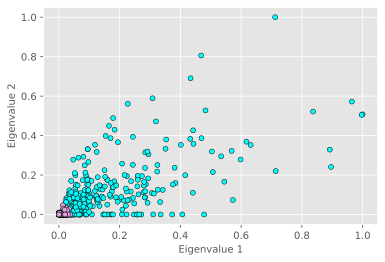

In [18]:
X_scale = np.array(X_train_scaled)
y_scale = np.array(y_train)
active = X_scale[np.argwhere(y_scale==1)]
deactive = X_scale[np.argwhere(y_scale==0)]
plt.scatter([s[0][0] for s in active], [s[0][1] for s in active], s = 25, color = 'cyan', edgecolor = 'k')
plt.scatter([s[0][0] for s in deactive], [s[0][1] for s in deactive], s = 25, color = 'plum', edgecolor = 'k')
plt.xlabel('Eigenvalue 1',fontsize=10)
plt.ylabel('Eigenvalue 2',fontsize=10)

**Neuronal Network - Cross validation**

*  NN sklearn: *https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier*
*  Activation function: *https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6*
*  Cross validation metric: *https://medium.com/analytics-vidhya/cross-validation-with-code-in-python-55b342840089*

*   An amendment please I meant number of neurons in hidden layer  equals ANN (2 x No of inputs) +1
*   The size of the hidden layer is normally between the size of the input and output-.It should be should be 2/3 the size of the input layerplus the size of the o/p layer The number of hidden neurons should be less than twice the size of the input layer.

*   *https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw*
*   *https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer#:~:text=The%20size%20of%20the%20hidden,size%20of%20the%20input%20layer.*

In [19]:
from sklearn.model_selection import cross_validate 
from sklearn.neural_network import MLPClassifier
from prettytable import PrettyTable

In [29]:
mpl = MLPClassifier()
mpl.get_params()


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [20]:
# Hyper-parameter tuning
hidden_layer_sizes = [(10,10,10),(9,),(3,)]
activation_solver = ['relu', 'logistic']
hyper_parameter_score_list=[]

In [21]:
for solv in activation_solver:
    for hidden in hidden_layer_sizes:
        mpl = MLPClassifier(hidden_layer_sizes=hidden,activation=solv,solver='adam',random_state=1,max_iter=11000)
        # k = 5
        scores = cross_validate(mpl, X_train_scaled, y_train, cv=5, scoring='accuracy')
        mean_scores = np.mean(scores['test_score'])
        hyper_parameter_score_list.append([hidden, solv, mean_scores])

In [22]:
# Select the best combination of hyper-parameters
myTable = PrettyTable(['hidden layer size', 'activation function', 'Accuracy'])
for row in hyper_parameter_score_list:
    myTable.add_row([row[0], row[1], round(row[2], 3)])
print(myTable)

+-------------------+---------------------+----------+
| hidden layer size | activation function | Accuracy |
+-------------------+---------------------+----------+
|    (10, 10, 10)   |         relu        |  0.896   |
|        (9,)       |         relu        |  0.869   |
|        (3,)       |         relu        |  0.862   |
|    (10, 10, 10)   |       logistic      |  0.555   |
|        (9,)       |       logistic      |  0.861   |
|        (3,)       |       logistic      |  0.858   |
+-------------------+---------------------+----------+


### **Plot results & scores**

In [23]:
mpl = MLPClassifier(hidden_layer_sizes=(10,10,10),activation='relu',solver='adam',random_state=1,max_iter=11000)
mpl.fit(X_train_scaled,y_train)
predictions = mpl.predict(X_test_scaled)
print('train data score:',mpl.score(X_train_scaled, y_train))
print('test data score:', mpl.score(X_test_scaled, predictions))

train data score: 0.8944
test data score: 1.0


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91        29
         1.0       0.93      0.95      0.94        41

    accuracy                           0.93        70
   macro avg       0.93      0.92      0.93        70
weighted avg       0.93      0.93      0.93        70



**Confusion Matrix**

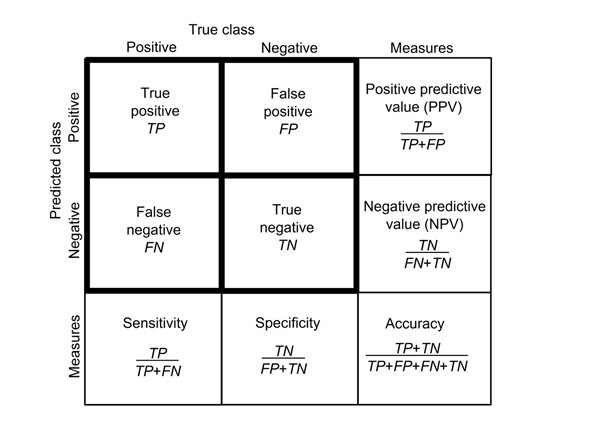

In [25]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[26,  3],
       [ 2, 39]])

In [26]:
df_val=pd.DataFrame({'Actual': y_test, 'Predicted':predictions})
df_val

Actual  Predicted
613     1.0        1.0
414     1.0        1.0
108     1.0        1.0
575     0.0        0.0
602     1.0        1.0
..      ...        ...
435     0.0        0.0
69      1.0        1.0
41      1.0        1.0
16      0.0        0.0
605     1.0        1.0

[70 rows x 2 columns]

In [27]:
def plot(xfeature_name, yfeature_name, xfeature, yfeature,real, predict):
    # setting color
    relbl_color = {0: 'plum', 1: 'cyan'} # relabel, 0:'not setosa' 1:'setosa'
    # plot
    plt.figure(figsize=(30*cm,10*cm))
    plt.subplot(1, 2, 1)
    plt.title("Real",fontsize=11)
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, real):
        plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k')
    plt.xscale('log')
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    plt.title("Prediction",fontsize=11)
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, predict):
        plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k')
    plt.xscale('log')
    plt.yscale('log')

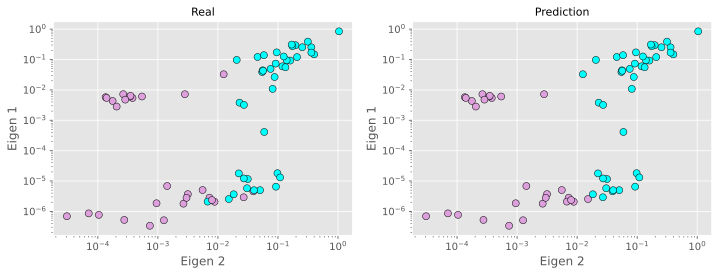

In [28]:
plot('Eigen 2', 'Eigen 1', X_test_scaled[:, 0], X_test_scaled[:, 1],y_test, predictions)
plt.show()